In [8]:
import os
import scipy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define your data folders
train_data_folder = 'C:/Users/tbrag/OneDrive/Desktop/BDA 696 Project/Multi Conditions database'

# Define parameters
batch_size = 32
img_size = (128, 128)
epochs = 10

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    train_data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and augment the validation data
validation_generator = datagen.flow_from_directory(
    train_data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Count the number of classes
num_classes = len(train_generator.class_indices)
print(num_classes)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3), padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Save the model
model.save('your_model.h5')

# Load and evaluate the model on a test dataset
#test_data_folder = 'C:/Users/tbrag/OneDrive/Desktop/BDA 696 Project/Covid/Covid/X-ray/Test'
#test_datagen = ImageDataGenerator(rescale=1./255)
#test_generator = test_datagen.flow_from_directory(
    #test_data_folder,
    #target_size=img_size,
    #batch_size=batch_size,
    #class_mode='categorical'
#)

# Evaluate the model on the test data
#evaluation_result = model.evaluate(test_generator)

# Print the evaluation result (accuracy and loss)
#print(f"Test Accuracy: {evaluation_result[1]*100:.2f}%")
#print(f"Test Loss: {evaluation_result[0]:.4f}")

Found 21974 images belonging to 5 classes.
Found 5492 images belonging to 5 classes.
5
{'name': 'conv2d_12', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 128, 128, 3), 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_11', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_13', 'trainable': True, 'dtype': 'float32', 'filters': 64

C:\Users\tbrag\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


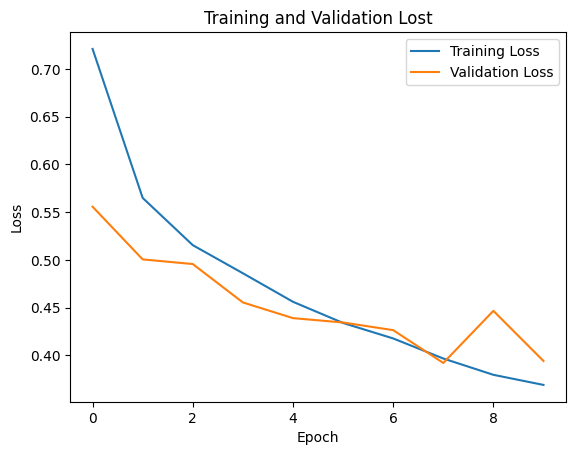

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Lost')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('multi x-ray loss graph.png')
plt.show()
